# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

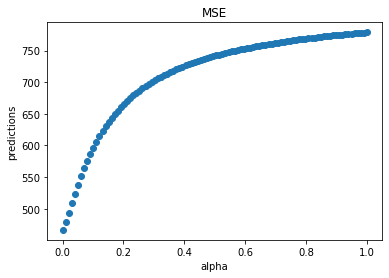

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = np.linspace(0, 1, 100)
predictions = []
val_set_size = 5
for alpha in alphas:
    pred_for_alpha = []
    for val_idx in range(0, len(x) - val_set_size, val_set_size):
        val_x = x[val_idx: val_idx + val_set_size]
        val_y = y[val_idx: val_idx + val_set_size]
        train_x = np.vstack([x[:val_idx], x[val_idx + val_set_size:]])
        train_y = np.vstack([y[:val_idx], y[val_idx + val_set_size:]])
        w = np.linalg.inv(train_x.T*train_x + alpha * I)*train_x.T*train_y
        w = w.ravel()
        val_pred = w * val_x.T
        pred_for_alpha.append(np.mean(np.square(val_pred.T - val_y)))
    predictions.append(np.mean(pred_for_alpha))

plt.xlabel('alpha')
plt.ylabel('predictions')
plt.title('MSE')
plt.scatter(alphas, predictions)
plt.show()

In [6]:
w

matrix([[-12.63827214,   0.68494349]])

## 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

In [7]:
def sgd(x, y):
    x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
    y = (y - y.mean()) / y.std()
    
    batch_size = 1
    alpha = 0.001
    beta = 0.0001
    w = np.zeros((2, 1))
    
    train_x = x[:8]
    train_y = y[:8]
    val_x = x[8:11]
    val_y = y[8:11]
    test_x = x[11:]
    test_y = y[11:]
    
    
    def loss(y_true, y_pred, w):
        return (1/(2*len(y_true))) * np.sum(np.square(y_true - y_pred)) + beta * np.sum(np.abs(w))
                
    def pred(x, w):
        return np.dot(x, w)
    
    def grad(x, y, w):
        y_pred = pred(x, w)
        dw = (-1/len(y)) * np.dot(x.T, (y - y_pred)) + beta * np.sum(np.sign(w))
        return dw
    
    l = []
    epoch = 0
    while True:
        train_loss = 0
        for batch in range(0, len(train_x), batch_size):
            batch_x = train_x[batch:batch+batch_size]
            batch_y = train_y[batch:batch+batch_size]
            dw = grad(batch_x, batch_y, w)
            w = w - alpha * dw
            train_loss += loss(batch_y, pred(batch_x, w), w)
        print(f'epoch: {epoch}, train loss: {train_loss}, val loss: {loss(val_y, pred(val_x, w), w)}')
        epoch += 1
        l.append(loss(val_y, pred(val_x, w), w))
        if len(l) > 6 and all(l[-1] > x for x in l[-2: -7:-1]):
            break

    return w

In [8]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

w = sgd(x, y)
w

epoch: 0, train loss: 4.551084812235263, val loss: 0.4552169021317744
epoch: 1, train loss: 4.518170114753355, val loss: 0.45031976552960506
epoch: 2, train loss: 4.485711974596406, val loss: 0.44547615423268644
epoch: 3, train loss: 4.453702102571164, val loss: 0.44068554881701866
epoch: 4, train loss: 4.422132374570283, val loss: 0.43594743695775506
epoch: 5, train loss: 4.390994828201437, val loss: 0.4312613133001123
epoch: 6, train loss: 4.360281659485709, val loss: 0.4266266793328904
epoch: 7, train loss: 4.329985219623799, val loss: 0.422043043264548
epoch: 8, train loss: 4.300098011828674, val loss: 0.41750991990178143
epoch: 9, train loss: 4.270612688223304, val loss: 0.413026830530554
epoch: 10, train loss: 4.241522046802109, val loss: 0.40859330279952644
epoch: 11, train loss: 4.212819028454841, val loss: 0.40420887060583705
epoch: 12, train loss: 4.184496714051606, val loss: 0.3998730739831844
epoch: 13, train loss: 4.156548321587755, val loss: 0.39558545899216413
epoch: 14,

matrix([[-0.00452186],
        [ 0.6530265 ]])

## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df.head()

x = iris_df[['sepal width (cm)', 'sepal length (cm)']].values # change here
y = pd.DataFrame(iris_data.target).values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

In [10]:
y_pred

array([[0.92478522, 1.05141831],
       [0.88521238, 1.03558917],
       [0.90104152, 1.01976004],
       [0.89312695, 1.01184547],
       [0.93269979, 1.04350374],
       [0.95644349, 1.07516201],
       [0.91687065, 1.01184547],
       [0.91687065, 1.04350374],
       [0.87729781, 0.99601633],
       [0.89312695, 1.03558917],
       [0.94061436, 1.07516201],
       [0.91687065, 1.02767461],
       [0.88521238, 1.02767461],
       [0.88521238, 0.98810177],
       [0.96435806, 1.10682029],
       [0.99601633, 1.09890572],
       [0.95644349, 1.07516201],
       [0.92478522, 1.05141831],
       [0.94852893, 1.09890572],
       [0.94852893, 1.05141831],
       [0.91687065, 1.07516201],
       [0.94061436, 1.05141831],
       [0.93269979, 1.01184547],
       [0.90895609, 1.05141831],
       [0.91687065, 1.02767461],
       [0.88521238, 1.04350374],
       [0.91687065, 1.04350374],
       [0.92478522, 1.05933288],
       [0.91687065, 1.05933288],
       [0.90104152, 1.01976004],
       [0.